###                      Compte rendu: projet d'Intelligence Artificielle

# TP1: Algorithme des K plus proches voisins


# I- Algorithme des K plus proches voisins

###### En intelligence artificielle, plus précisément en apprentissage automatique, la méthode des k plus proches voisins( KPPV)
est une méthode d’apprentissage supervis\'e, c'est-à-dire qu'on va considérer un training set ( ensemble de données) qui va surveiller notre apprentissage.
Dans cette partie, l'algorithme des KPPV va nous permettre de classer des objets suivant leur classe ( 1 ou 0). Pour ce faire, on dispose des données suivantes:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
from math import*
from sympy import*
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [45]:

# Données de test
mean1 = [4, 4]#moyenne de la distribution
cov1 = [[1, 0], [0, 1]] # Matrice de covariance de la distribution
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]] # Matrice de covariance de la distribution. 
                        #Elle doit être symétrique et semi-définie positive pour un échantillonnage correct.
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128),np.ones(128)))#liste des classe

#Création des donnée de teste
test1=np.transpose(np.random.multivariate_normal(mean1, cov1, 64))
test2=np.transpose(np.random.multivariate_normal(mean2, cov2,64))
test=np.concatenate((test1,test2), axis=1)
K=3


Afin, de déterminer les k plus proches voisin à un point x, il nous faut évaluer la distance entre ce point et tous les autres point données d'apprentissage. Pour se faire nous avons crée une fonction  qui correspond à la norme 2:


In [46]:
def distance_euclidienne(point1,point2):
    d_carre=(point1[0]-point2[0])**2+(point1[1]-point2[1])**2   
    return sqrt(d_carre)

Nous allons ensuite déterminer grâce à notre algorithme KPPV, la classe à laquelle appartient l'individu x:

Algorithme KPPV
1. Déterminer la distance entre x et tout les point de l'ensemble d'apprentissage
2. Ranger ces distance dans une liste dist
3. Récupérer les indices des distance triées par ordre croissant
4. Récuper les K premiers et les ranger dans une liste
5. Déterminer la classe de chaque indice voisin à x
5. Compter les indice de même classe
6. La classe de x est la classe majoritaire


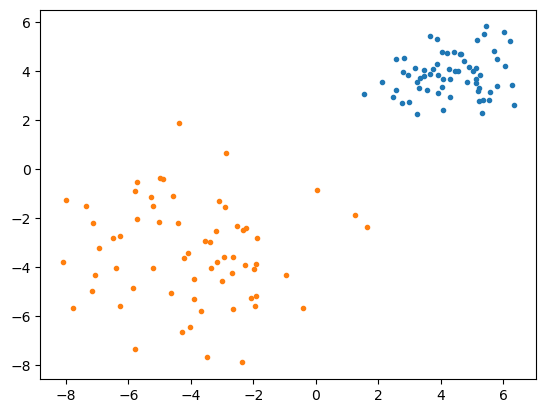

This time is being calculated
0.26179790000060166
K=3 1.0


In [49]:

import time

start = time.perf_counter()

def kppv_i(x,appren,oracle,K):    
    dist   = []
    indice = []
    l      = [] 
    t      = 0
    
    
    classe=0 # On initialise la classe à 0 dans le cas contraire à la suite
    for j in range(len(appren[0])):
        
        d = distance_euclidienne(appren[:,j],x) # calcul la distance euclidienne entre le point x [:,i] et appren[:,j]
        dist.append((d))# la fonction __.append() remplie la liste_distance_a_xi entre le point x[:,i] et tout les points 
                        #de appren
        
        #l=sorted(dist) #trie la liste par autre croissant des distances
    l = np.argsort(dist) # renvoie les indices des distances triées par ordre croisant
      
    for k in range(K):
        indice.append((l[k]))# On construit une liste contenant les indices des k plus proche voisins de x
        
    for j in range(K):
        if(oracle[indice[j]]==1):               
            t = t+1 # On compte ceux qui sont de classe 1
            
    if(t>=int(K/2)+1):# On vérifie  si ceux qui sont de classe 1 sont en majorité
        classe=1  # On ce cas la  classe prend la valeur 1
    return classe


### Application de notre algorithme sur les données de test

def kppv(test,appren,oracle,K):
    clas=[]
    for i in range(len(test[0])):
        classe=kppv_i(test[:,i],appren,oracle,K)# On détermine la classe de chaque élements de notre ensemble de test
        clas.append((classe)) # Puis on ajoute cette classe dans uns liste
    clas=np.array(clas) # Puis que les données renvoyées doivent être dans un tableau, on converti la liste en tableau numpy
    #print(len(clas))
    return (clas)

def affiche_classe(x,clas,K):
    for k in range(0,K):
        ind=(clas==k)
        plt.plot(x[0,ind],x[1,ind],".")
       
    plt.show()
    
orace=np.concatenate((np.zeros(64),np.ones(64)))
clas=kppv(test,data,oracle,K)
affiche_classe(test,clas,K)


print("This time is being calculated")

end = time.perf_counter()

print(end - start)

from sklearn import metrics
accuracy = metrics.accuracy_score(clas, orace)
print("K=3",accuracy)



K=15 1.0


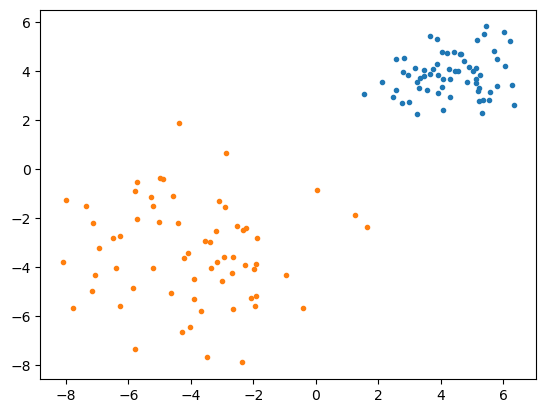

This time is being calculated
0.18259100000000217


In [48]:

clas15=kppv(test,data,oracle,30)
accuracy15 = metrics.accuracy_score(clas15, orace)
print("K=15",accuracy15)

start = time.perf_counter()
affiche_classe(test,clas15,30)
print("This time is being calculated")

end = time.perf_counter()

print(end - start)

# II- Perceptron

Le perceptron est un algorithme d'apprentissage supervisé de classifieurs binaires (c'est-à-dire séparant deux classes). Il a été inventé en 1957 par Frank Rosenblatt1 au laboratoire d'aéronautique de l'université Cornell. Il s'agit d'un neurone formel muni d'une règle d'apprentissage qui permet de déterminer automatiquement les poids synaptiques de manière à séparer un problème d'apprentissage supervisé. Si le problème est linéairement séparable, un théorème assure que la règle du perceptron permet de trouver une séparatrice entre les deux classes.


[32, 8, 4, 0, 0, 0, 0, 0, 0, 0]


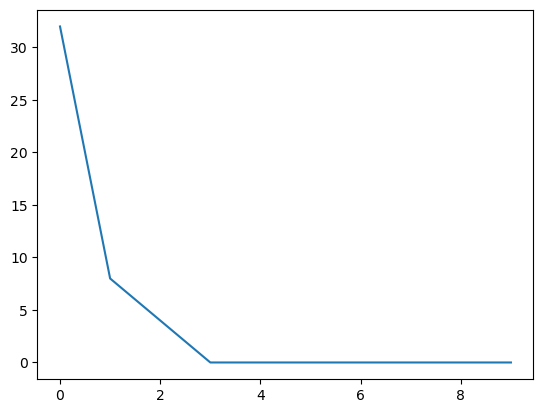

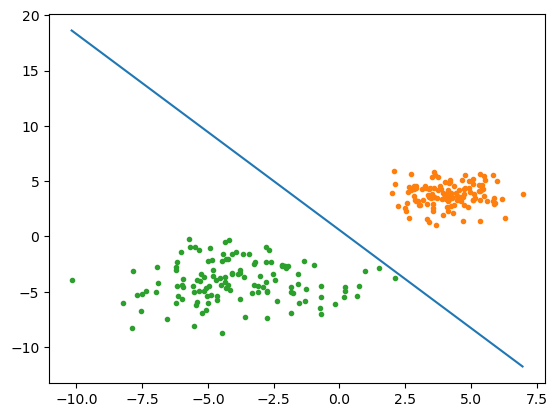

In [50]:

#Données de test
N=10 #Nombre d'époques

mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]] #
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]] #
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128)-1,np.ones(128)))


def produit_sc(x,y):
    s=x[0]*y[1]+x[1]*y[2]
    return s

def sigmoide(x):#Fonction sigmoide
    z=1/(1+exp(-x))
    return z

def perceptron(x,w,active,b):
    y=0
    if(active==0):
        y=sign(b+produit_sc(x,w))#y prend le signe de b+produit_sc(x,w)
    if(active==1):
        if(sigmoide(b+produit_sc(x,w))>=0.5):#
            y=1
        if(sigmoide(b+produit_sc(x,w))<0.5):
            y=-1
    return y

def apprentissage(x,yd,active):
    w=[1,-2,4] #Initialisation de w
    mdiff=[]
    b=0.5 #initilalisation
    for j in range(N):# On crée les époque
        r=0 #Après chaque époque l'erreur est initialisé à 0 pour éviter le cumul d'erreur
        for i in range(len(yd)):
            if(perceptron(x[:,i],w,active,b)!=yd[i]):# test si classe prédite par le perceptron est la même que celle désirée 
                r=r+4 #erreur (yd_i-y_i)²=(1-(-1))²=(-1-1)²=4
                d=yd[i]-sigmoide(b+produit_sc(x[:,i],w))# Puis on détermine l'erreur d'apprentissage
                [w[1],w[2]]=[w[1],w[2]]+0.1*d*x[:,i] # on fait apprendre les paramètres variant de w
                b=b+0.1*d # puis on fait apprendre le biais
      
        mdiff.append((r))# Après chaque époque, on range l'erreur cummulée dans une liste mdiff
    print(mdiff)
    return w,mdiff 


def affiche_classe(x,clas,K,w):
    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0]-w[1]*np.min(x[0,:]))/w[2],(-w[0]-w[1]*np.max(x[0,:]))/w[2]]# modifier le code qui contenait quelques erreurs

    plt.plot(t,z);

    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],".")

    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],".")

    plt.show()
    


w,mdiff=apprentissage(data,oracle,1)
#mdiff=[47,28,15,16,3,58]

plt.plot(mdiff)
plt.show()
affiche_classe(data,oracle,2,w)



# TP2: Construction d'un Anti_Spam

#### Avec les machines qui commence à immiter très bien l'intélligence humaines, nous voudrions que celles-ci soient en mesure de détecter si un courier est indésirables ou pas. La construction d'un Anti-Spam est alors un moyen de donner à la machine cette capacité.
Dans cette partie nous allons mettre en œuvre un Anti-Spam en réalisant des modèles de
classifieurs binaires construits à l'aide d'un DataSet (fourni) basé sur les activités normales et
anormales d'une messagerie électronique

In [12]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Etape 1: Dataset

Nous important nos données que l'on va nettoyer pour mieux les exploiter.

In [13]:
#import de la dataset
data=pd.read_csv("Spam detection - For model creation.csv",sep=";")
data
class_le= LabelEncoder()#
data['GOAL-Spam']=class_le.fit_transform(data['GOAL-Spam'].values)# Transforme les données de la colonne GOAL-SPAM qui contient 
                                                                  # des No et Yes en 0 pour No et 1 pour Yes
print("Shape is:",data.shape)
data

Shape is: (2972, 58)


,GOAL-Spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0,0.00,0.00,0.00,0.0,0.19,0.00,0.00,0.00,0.09,...,0.19,0.000,0.096,0.027,0.068,0.000,0.000,2.059,25,593
1,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.091,0.000,0.045,0.000,0.000,2.333,15,175
2,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,2.013,0.000,0.000,0.000,0.000,3.500,28,42
3,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,7
4,0,0.00,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.413,0.000,0.000,0.000,0.000,4.360,46,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,1.118,17.481,49,472
2968,0,0.09,0.00,0.27,0.0,0.36,0.09,0.00,0.18,0.09,...,0.00,0.016,0.048,0.032,0.257,0.032,0.032,3.689,69,535
2969,0,0.00,0.67,0.33,0.0,0.33,0.33,0.33,0.33,0.00,...,0.00,0.000,0.053,0.000,0.160,0.000,0.107,6.111,139,275
2970,1,0.00,0.00,0.00,0.0,0.70,0.00,0.00,0.88,0.00,...,0.00,0.000,0.086,0.000,0.057,0.000,0.000,1.472,15,162


# Etape 2: Données de prédiction

In [14]:
#Données de prédictions
data_prediction=pd.read_csv("Spam detection - For prediction.csv")
data_prediction

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.70,0.00,0.70,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.000,1,4,0
2,0.00,0.00,0.00,0.0,0.00,0.0,0.45,0.91,0.45,0.91,...,0.000,0.254,0.0,0.063,0.127,0.000,4.735,46,161,1
3,1.88,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.168,0.0,0.112,0.000,0.056,2.933,23,311,0
4,0.07,0.07,0.07,0.0,0.14,0.0,0.00,0.43,0.00,0.00,...,0.056,0.094,0.0,0.000,0.028,0.000,2.394,24,881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.121,0.605,0.0,0.000,0.000,0.000,2.222,22,100,1
1270,0.00,0.00,0.64,0.0,0.64,0.0,0.00,0.00,0.00,1.29,...,0.000,0.000,0.0,0.574,0.000,0.000,5.833,30,105,1
1271,0.00,0.70,1.05,0.0,0.35,0.0,0.00,0.00,0.00,0.00,...,0.000,0.056,0.0,0.897,0.000,0.000,4.430,121,350,1
1272,0.00,0.68,0.34,0.0,0.34,0.0,0.00,0.00,0.00,0.00,...,0.000,0.055,0.0,0.718,0.000,0.000,3.718,61,264,1


# Préparation des Données

In [15]:
x_train=data_prediction.drop('Spam', axis=1) #Dans le fichier data_prédiction on supprime la colonne Spam qui contient 
                                             #les valeur de préduction
y_train=data_prediction['Spam'] #

x_test=data.drop('GOAL-Spam', axis=1)
y_test=data['GOAL-Spam']

print("x_test:", x_test.shape,"y_test",y_test.shape)
print("x_train:", x_train.shape,"y_train",y_test.shape)


x_test: (2972, 57) y_test (2972,)
x_train: (1274, 57) y_train (2972,)


On va ensuite convertir nos données en tableau numpy

In [16]:
x_test, y_test=np.array(x_test), np.array(y_test)
x_train, y_train=np.array(x_train), np.array(y_train)

# I- Model M1: Réseau de neurone sans couche cachée

In [17]:

model = keras.Sequential()
model.add(keras.layers.Input(57, name="InputLayer"))#Couche d'entrée
model.add(keras.layers.Dense(1, activation="sigmoid"))#Couche de sortie

model.compile(loss=keras.losses.categorical_hinge,
             optimizer="adam",# Nous permet de minimiser l'erreur
             metrics=['accuracy'])


In [18]:
model_output=model.predict(x_test)
print(model_output)

93/93 [==============================] - 1s 5ms/step
[[1.        ]
 [1.        ]
 [0.10949335]
 ...
 [0.9992149 ]
 [1.        ]
 [1.        ]]


In [19]:
model.summary()#resume du model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 58        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train,
                    y_train,
                   epochs = 20,#nombre d'époques
                   batch_size = 10)#correction après chaque dizaine                               

Epoch 1/20
128/128 [==============================] - 1s 2ms/step - loss: 1.0926 - accuracy: 0.4670
Epoch 2/20
128/128 [==============================] - 0s 2ms/step - loss: 1.0712 - accuracy: 0.4859
Epoch 3/20
128/128 [==============================] - 0s 2ms/step - loss: 1.0489 - accuracy: 0.5110
Epoch 4/20
128/128 [==============================] - 0s 2ms/step - loss: 1.0178 - accuracy: 0.5612
Epoch 5/20
128/128 [==============================] - 0s 2ms/step - loss: 0.9918 - accuracy: 0.5965
Epoch 6/20
128/128 [==============================] - 0s 2ms/step - loss: 0.9675 - accuracy: 0.6232
Epoch 7/20
128/128 [==============================] - 0s 2ms/step - loss: 0.9451 - accuracy: 0.6484
Epoch 8/20
128/128 [==============================] - 0s 2ms/step - loss: 0.9233 - accuracy: 0.6750
Epoch 9/20
128/128 [==============================] - 0s 3ms/step - loss: 0.8994 - accuracy: 0.6978
Epoch 10/20
128/128 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.7308

In [21]:
model.evaluate(x_test,y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.7250 - accuracy: 0.8987


[0.7250258326530457, 0.8987213969230652]

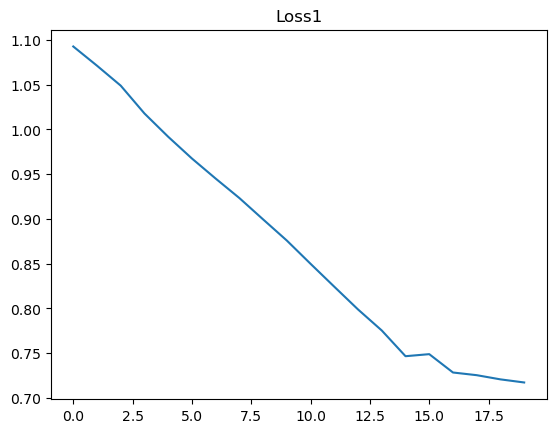

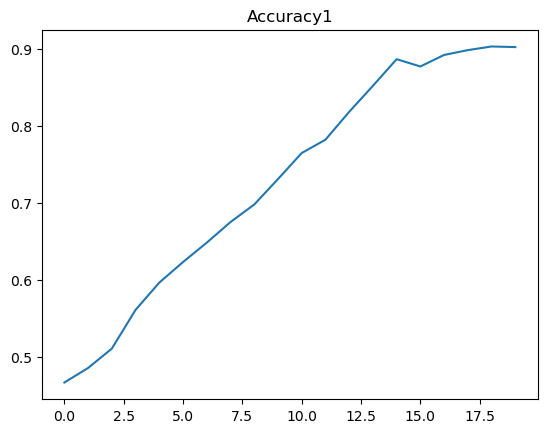

In [32]:
loss_curve1=history.history["loss"]
accuracy_curve1=history.history["accuracy"]
plt.plot(loss_curve1)
plt.title("Loss1")
plt.show()

plt.plot(accuracy_curve1)
plt.title("Accuracy1")
plt.show()

In [33]:
print(accuracy_curve1[19])

0.9018838405609131


# II- Model M2: Réseau de neurone avec une couche cachée

In [34]:

model = keras.Sequential()
model.add(keras.layers.Input(57, name="InputLayer"))#Couche d'entrée
model.add(keras.layers.Dense(10, activation="sigmoid"))#couche cachée
model.add(keras.layers.Dense(1, activation="sigmoid"))# couche de sortie

model.compile(loss=keras.losses.hinge,# l'erreur loss=keras.losses.hinge
             optimizer="adam",# Nous permet de minimiser l'erreur
             metrics=['accuracy'])

    

In [35]:
model_output=model.predict(x_test)
print(model_output)

93/93 [==============================] - 0s 2ms/step
[[0.85192543]
 [0.817276  ]
 [0.7462726 ]
 ...
 [0.6810113 ]
 [0.8182163 ]
 [0.79352325]]


In [36]:
history = model.fit(x_train,
                    y_train,
                   epochs = 20,
                   batch_size = 10)                                

Epoch 1/20
128/128 [==============================] - 1s 3ms/step - loss: 1.0840 - accuracy: 0.4545
Epoch 2/20
128/128 [==============================] - 0s 3ms/step - loss: 1.0251 - accuracy: 0.6122
Epoch 3/20
128/128 [==============================] - 0s 3ms/step - loss: 0.9720 - accuracy: 0.7284
Epoch 4/20
128/128 [==============================] - 0s 3ms/step - loss: 0.9291 - accuracy: 0.7786
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.8281
Epoch 6/20
128/128 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.8477
Epoch 7/20
128/128 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.8673
Epoch 8/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7960 - accuracy: 0.8870
Epoch 9/20
128/128 [==============================] - 0s 4ms/step - loss: 0.7738 - accuracy: 0.8995
Epoch 10/20
128/128 [==============================] - 1s 4ms/step - loss: 0.7556 - accuracy: 0.9097

In [37]:
model.evaluate(x_test,y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.9223


[0.6861916780471802, 0.9222745895385742]

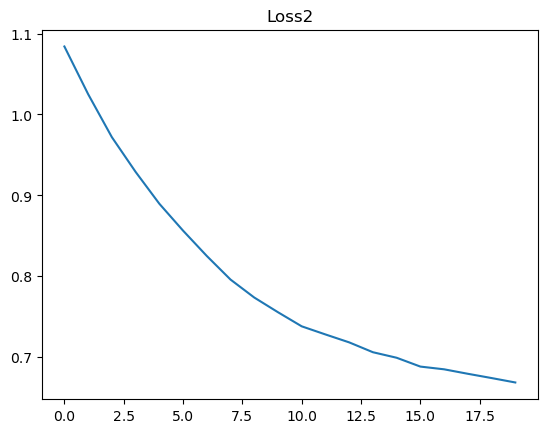

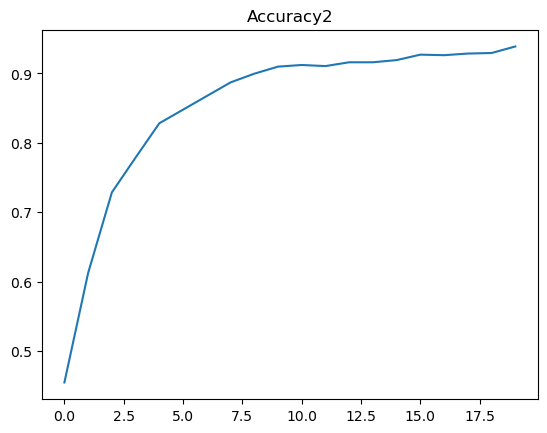

In [38]:
loss_curve2=history.history["loss"]
accuracy_curve2=history.history["accuracy"]
plt.plot(loss_curve2)
plt.title("Loss2")
plt.show()

plt.plot(accuracy_curve2)
plt.title("Accuracy2")
plt.show()

In [39]:
print(accuracy_curve2[19])

0.9387755393981934


# III-  Model M3: Classifieur de Bayes

In [40]:
import math
from math import*
from sklearn.preprocessing import LabelEncoder

In [41]:
T=pd.read_csv("Spam detection - For model creation.csv",sep=";")
T_prediction=pd.read_csv("Spam detection - For prediction.csv")
data=np.array(T_prediction)
class_le= LabelEncoder()
T['GOAL-Spam']=class_le.fit_transform(T['GOAL-Spam'].values)


In [42]:
T1=np.array(T)

In [43]:
import scipy.stats
def Clas_Bayes(data):
    esp0    = []
    esp1    = []
    ecar_t0 = []
    ecar_t1 = []
    liste0  = []
    liste1  = []
    
    for i in range(len(T)): #Dans cette boucle on va créer les listes des indices des élements de classe 0 et 1
        if(T1[i,0]==0):
            liste0.append((i))# On ajoute à liste0 tous les élements de classe 0
        if(T1[i,0]==1):
            liste1.append((i))# On ajoute à liste1 tous les élements de classe 1
    n0=len(liste0) # Cardinal de liste0
    n1=len(liste1) # Cardinal de liste1
    for j in range(len(T.columns)):
        
        esp0.append((sum(T1[i,j] for i in liste0))/n0)# on calcul l'espérance de chaque critère de détection de spam sachant que la classe est 0 
        esp1.append((sum(T1[i,j] for i in liste1))/n1)# on calcul l'espérance de chaque critère de détection de spam sachant que la classe est 1 
        ecar_t0.append(sqrt(sum((T1[i,j]-esp0[j])**2 for i in liste0)/(n0-1)))# on calcul la variance de chaque critère de détection de spam sachant que la classe est 0 
        ecar_t1.append(sqrt(sum((T1[i,j]-esp1[j])**2 for i in liste1)/(n1-1)))# on calcul la variance de chaque critère de détection de spam sachant que la classe est 1 

    del esp0[0]    # Suppression de l'espérance de classe 0
    del esp1[0]    # Suppression de l'espérance de classe 1
    del ecar_t0[0] # Suppression de l'espérance de classe 0
    del ecar_t1[0] # Suppression de l'espérance de classe 1
    
   
    # liste des produit des fonctions densite classe 0 
    oracle0 = []
    
    for i in range(len(data)):
        p0=n0/len(T) # Probabilité de la classe 0
        for j in range(len(T.columns)-1):
            mu    = esp0[j] # Espérance 
            sigma = ecar_t0[j] # Ecart-type
            #f=scipy.stats.norm.pdf(data[i,j],sigma,mu)
            p0 = p0*1/(sigma*sqrt(2*pi))*exp(-0.5*((data[i,j]-mu)/sigma)**2) # produit des fonctions de densité par p0

        oracle0.append((p0)) 
        
    # liste des produit des fonctions densite classe 1   
    oracle1 = []

    for i in range(len(data)):
        p1 = n1/len(T)# Probalilité de la classe 1
        for j in range(len(T.columns)-1):
            mu    = esp1[j] # Espérance
            sigma = ecar_t1[j] # Ecart-type
            if(mu!=0): #
               #f=scipy.stats.norm.pdf(data[i,j],sigma,mu)
                p1 = p1*1/(sigma*sqrt(2*pi))*exp(-0.5*((data[i,j]-mu)/sigma)**2)# produit des fonctions de densité par p1

        oracle1.append((p1))

    
    oracle = []
    for i in range(len(data)):#'Lindividu i de data aura la classe majoritaire
        t = 0
        if(oracle1[i]>oracle0[i]):  
            t=1
        oracle.append((t))
    
    return oracle

###  Comparaison

In [44]:
# Comparaison des Accuracy (Perfomance de  chaque model)

from sklearn import metrics
accuracy3 = metrics.accuracy_score(data[:,57], Clas_Bayes(data))

print("<<<Accuracy M1:",accuracy_curve1[19],">>> <<<Accuracy M2: ",accuracy_curve2[19],">>> <<<Accuracy M3: ",accuracy3,">>>")


<<<Accuracy M1: 0.9018838405609131 >>> <<<Accuracy M2:  0.9387755393981934 >>> <<<Accuracy M3:  0.8163265306122449 >>>
